# Implementation from Scratch d'un Réseau de neurones

Pour implémenter un réseau de neurones capable de résoudre le problème du XOR, nous allons suivre les étapes suivantes :

- Générer le dataset de 300 points.
- Diviser le dataset en ensembles de formation (80%) et de test (20%).
- Créer une classe NN pour le réseau de neurones qui inclut les méthodes __init__, fit, et predict.
- Évaluer la performance du modèle.
- Tracer le graphe pour visualiser la séparation des données par le modèle.

## Générer la Dataset

Nous allons générer un dataset de 300 points avec des étiquettes pour le problème XOR.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Génération du dataset XOR
def generate_xor_data(n=300):
    X = np.random.rand(n, 2) * 2 - 1  # points entre -1 et 1
    y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
    return X, y

# Génération des données
X, y = generate_xor_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Créer la Classe `NN`
Nous allons créer une classe `NN` avec les méthodes nécessaires pour entraîner et prédire.

In [18]:
# Neural Network class
# Neural Network class
class NN:
    def __init__(self, epochs=1000, learning_rate=0.01):
        self.epochs = epochs
        self.learning_rate = learning_rate

    def _initialize_weights(self, layer_sizes):
        self.weights = []
        self.biases = []
        for i in range(len(layer_sizes) - 1):
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i + 1]) * np.sqrt(2.0 / layer_sizes[i]))
            self.biases.append(np.zeros((1, layer_sizes[i + 1])))

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _sigmoid_derivative(self, z):
        return z * (1 - z)

    def fit(self, X, y, architecture=[2, 6, 1]):
        self._initialize_weights(architecture)
        y = y.reshape(-1, 1)

        for epoch in range(self.epochs):
            # Forward pass
            A = [X]
            for w, b in zip(self.weights, self.biases):
                A.append(self._sigmoid(np.dot(A[-1], w) + b))

            # Backward pass
            deltas = [A[-1] - y]
            for i in range(len(architecture) - 2, 0, -1):
                deltas.append(deltas[-1].dot(self.weights[i].T) * self._sigmoid_derivative(A[i]))
            deltas.reverse()

            # Gradient descent update
            for i in range(len(self.weights)):
                self.weights[i] -= self.learning_rate * A[i].T.dot(deltas[i])
                self.biases[i] -= self.learning_rate * np.sum(deltas[i], axis=0, keepdims=True)


    def predict(self, X):
        A = X
        for w, b in zip(self.weights, self.biases):
            A = self._sigmoid(np.dot(A, w) + b)
        return (A > 0.5).astype(int)

# Entraînement du modèle
nn = NN(epochs=10000, learning_rate=0.1)
nn.fit(X_train, y_train)

# Prédictions
y_pred = nn.predict(X_test)


## Évaluer la Performance du Modèle
Nous allons créer une fonction pour calculer l'accuracy du modèle et l'utiliser pour évaluer le modèle sur les données de test.

In [19]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Calcul de l'accuracy
acc = accuracy(y_test, y_pred)
print(f"Accuracy: {acc * 100:.2f}%")


Accuracy: 50.00%


## Tracer le Graphe
Nous allons tracer les points de test et la séparation faite par le modèle.

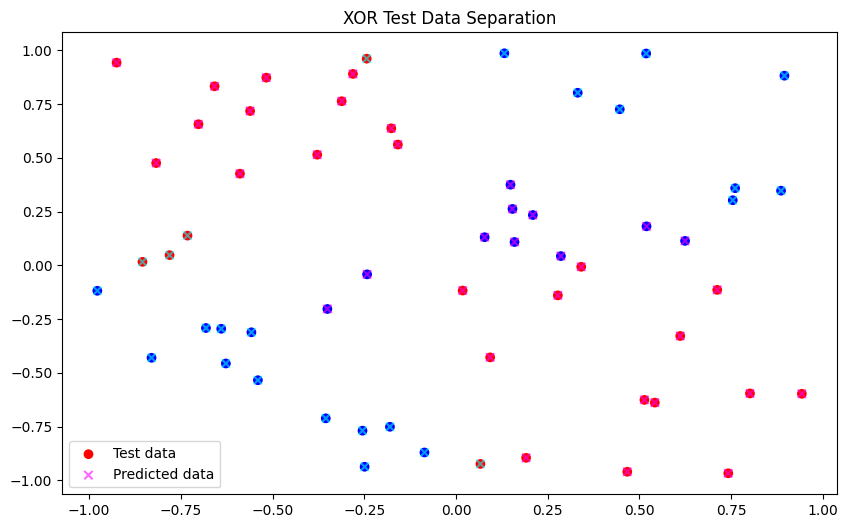

In [20]:
# Tracé des résultats
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', marker='o', label='Test data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred.flatten(), cmap='cool', marker='x', label='Predicted data', alpha=0.6)
plt.title('XOR Test Data Separation')
plt.legend()
plt.show()
